# Example 001: Trajectory in a Dipole

In this example the electron trajectory in a dipole is calculated and plotted.  Some attempt is made to explain each step along the way.

We will first start by looking at the trajectory where we set the initial conditions for a particle *outside* of the dipole magnet (as is typical in the case of looking at undulators).

In [1]:
# This has nothing to do with OSCARS, but it puts the matplotlib plots inline in the notebook
%matplotlib inline

# Import the OSCARS SR module
import oscars.sr

# Import basic plot utilities.  You don't need these to run OSCARS, but it's used here for basic plots
from oscars.plots_mpl import *

OSCARS v1.31.05 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
# Create a new OSCARS object
osr = oscars.sr.sr()

## Create the dipole field

Here we create the dipole field.  Here *bfield* represents magnetic field [$B_x, B_y, B_z$].  The *width* is also in vector form which allows you to specify the spatial extent of the uniform field.  If one component is zero then that spatial dimension is ignored (the field extends to $\pm \infty$ in that dimension).

Typically clear_magnetic_fields() is called before adding a field in notebooks only to save time when making changes and rerunning sections of the code so it is not strictly necessary.

In [3]:
# Clear any existing fields (just good habit in notebook style) and add an undulator field
osr.clear_bfields()
osr.add_bfield_uniform(bfield=[0, -0.4, 0], width=[0, 0, 1])

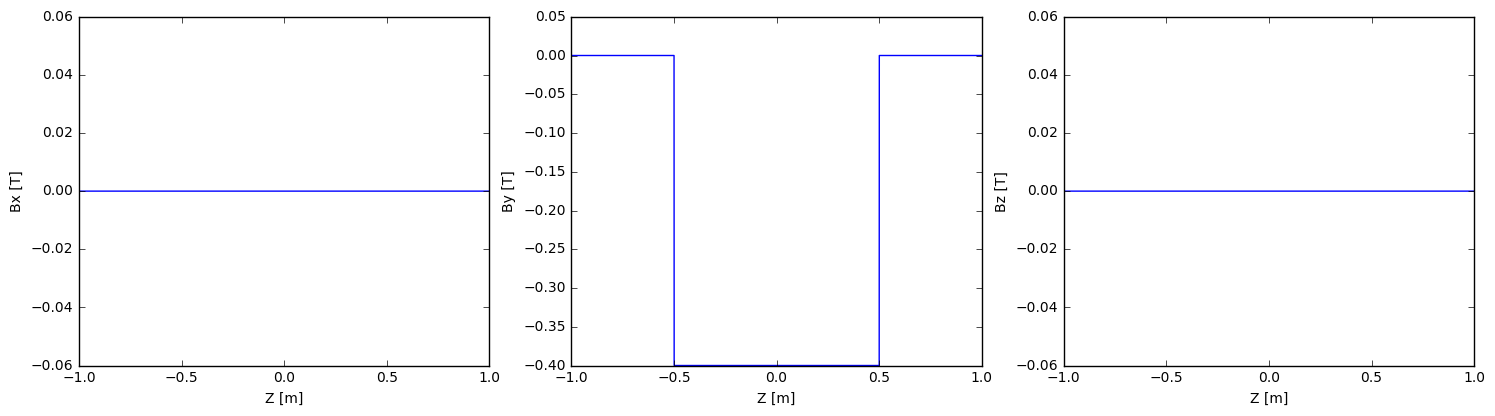

In [4]:
# Just to check the field that we added seems visually correct
plot_bfield(osr, -1, 1)

## Add a particle beam

Now we add a simple particle beam.  There are a few important things to understand about the setup of magnetic fields and particle beams, namely positions and times.  You can define the initial position and time of a particle beam to be anywhere you like.  The default initial time for a beam is t=0.  You must specify the initial position, which for this simple example it is recommended to be *before* the undulator (in the plot at z=-1 [m] is a good choice if the particle beam is defined to be going in the +z direction as is done below.

One must specify ctstartstop.  This is the start and stop time of the calculation.  In this example we will start the calculation at t=0 and go to t=2 (given in units of ct) since the beam is relativistic.  In this example you can specify the start time as less than 0 which is useful if you want to propogate the particle backwars in time.  This is useful for instance if you have a bending magnet before the undulator that you wish to include.

clear_particle_beams() is called, again for convenience, but it is not necessary.

In [5]:
# Setup beam similar to NSLSII
osr.clear_particle_beams()
osr.set_particle_beam(type='electron',
                      name='beam_0',
                      x0=[0, 0, -1],
                      d0=[0, 0, 1],
                      energy_GeV=3,
                      current=0.500
                     )

# Set the start and stop times for the calculation
osr.set_ctstartstop(0, 2)

## Calculate Trajectory

Now we calculate the trajectory and plot it.  It is enough to call calculate_trajectory().  If you are doing other calculations (flux, spectra, power density) it is not necesary to call this since it is called internally.

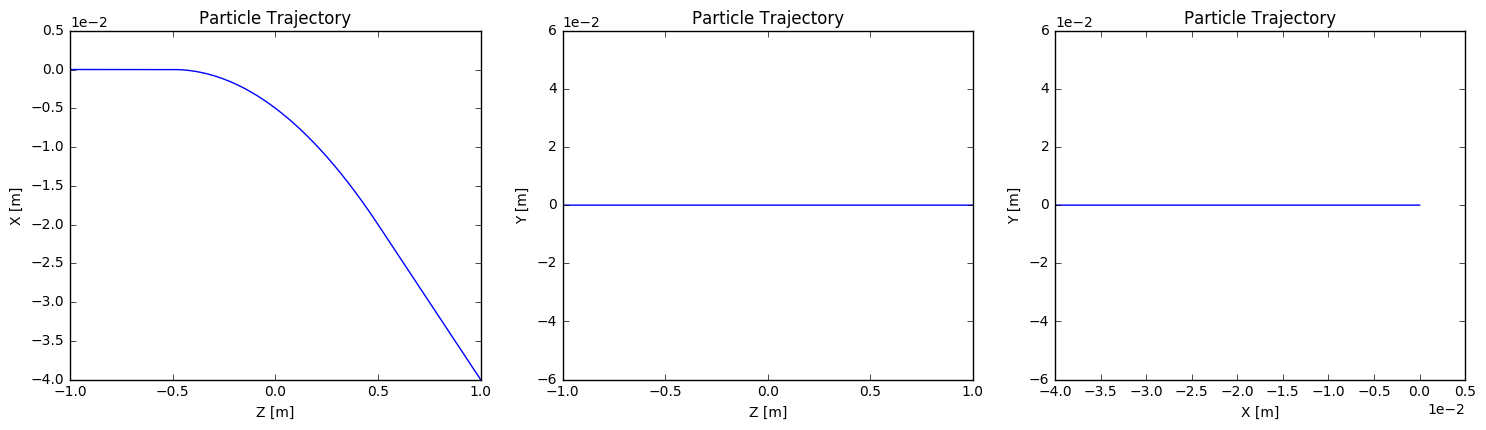

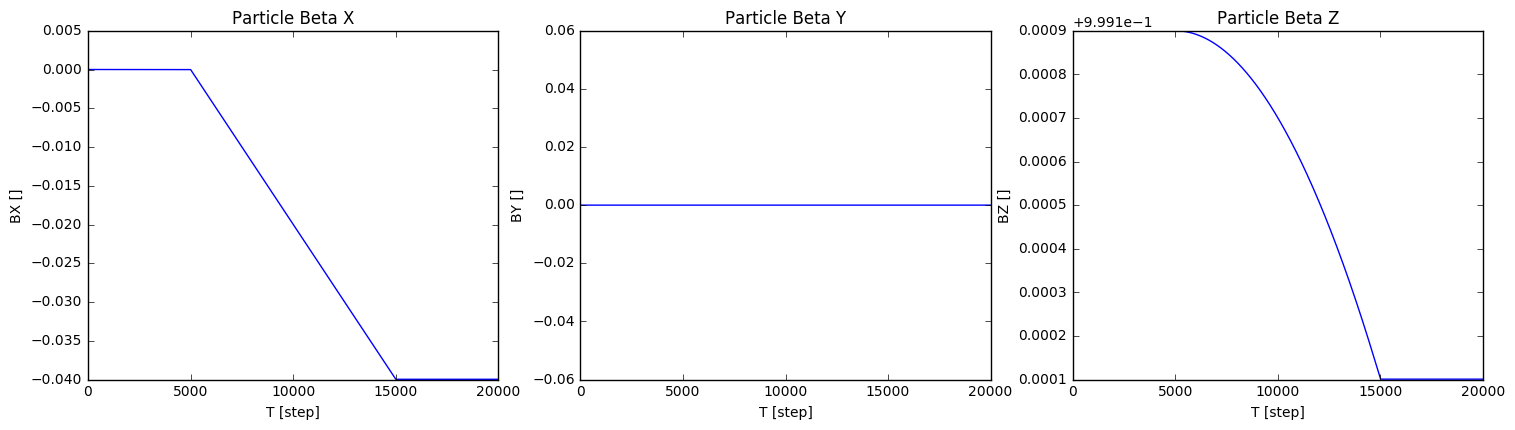

In [6]:
# Run the particle trajectory calculation
trajectory = osr.calculate_trajectory()

# Plot the trajectory position and velocity
plot_trajectory_position(trajectory)
plot_trajectory_velocity(trajectory)

## Alternate Starting Position (and backward propogation)

Here we set the beam *t0* in the middle of the dipole.  This is convienent for some calculations.

In order to propogate the particle backwards from the point given for its initial conditions one simply changes the definition of either the beam *t0* or the *ctstartstop*.  Here we will change *ctstartstop* and *x0* parameters.

In [7]:
# Setup beam similar to NSLSII
osr.clear_particle_beams()
osr.set_particle_beam(type='electron',
                      name='beam_0',
                      x0=[0, 0, 0],
                      d0=[0, 0, 1],
                      energy_GeV=3,
                      current=0.500
                     )

# Set the start and stop times for the calculation
osr.set_ctstartstop(-1, 1)

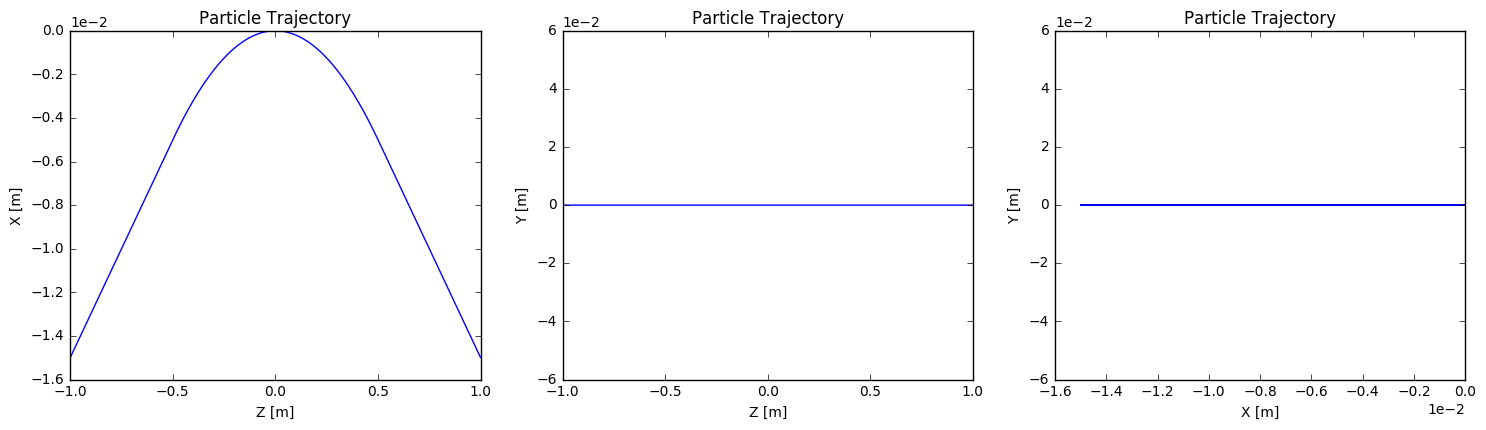

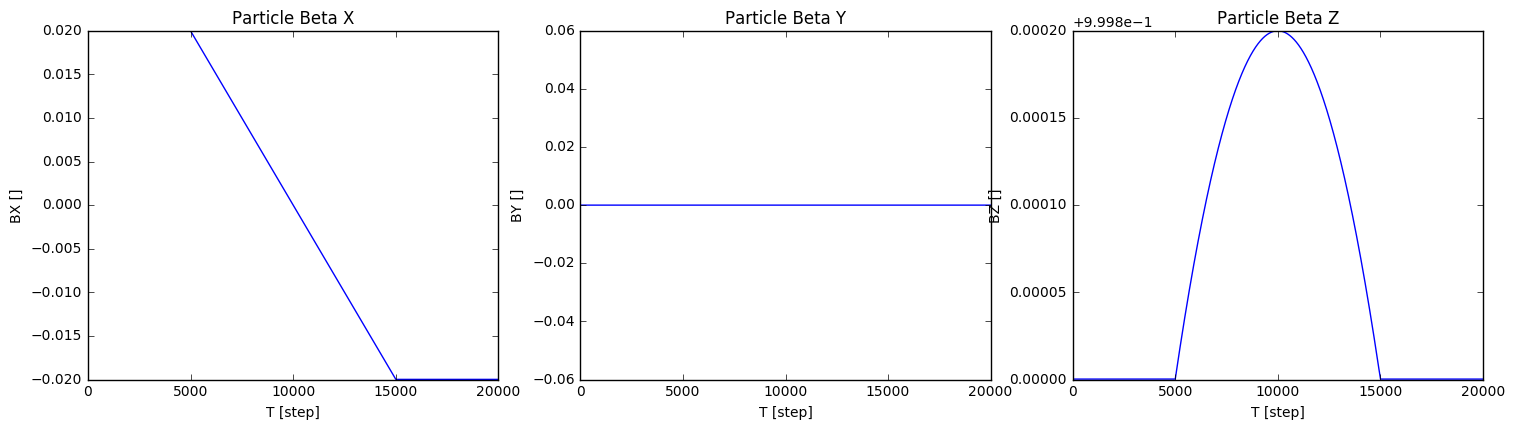

In [8]:
# Run the particle trajectory calculation
trajectory = osr.calculate_trajectory()

# Plot the trajectory position and velocity
plot_trajectory_position(trajectory)
plot_trajectory_velocity(trajectory)

In [9]:
# If you want to convert the notebook to HTML
import os
os.system('jupyter nbconvert --to html Example_001_DipoleTrajectory.ipynb')

0